In [1]:
import tensorflow as tf   ##used for implemening machine learning and deep learning applicaion

In [ ]:
##############   data loading   and preprocessing

In [2]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [5]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=50

In [6]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE                                  ##loading all images and distribute imgaes in batch 32 internally
)

Found 2152 files belonging to 3 classes.


In [7]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
dataset.take(1)    ## return 1 sample of 32 batchsize

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

(32, 256, 256, 3)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([2, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1])>>


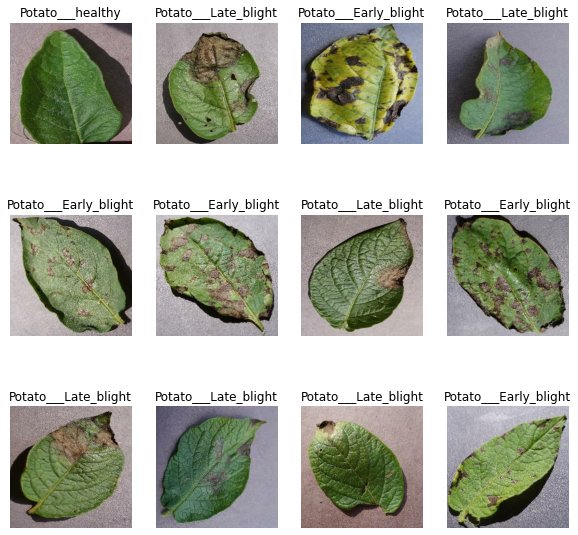

In [9]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy)    #(32, 256, 256, 3)  32=images     256 x 256 =image size     3=RGB red green blue
    for i in range(12):
        ax=plt.subplot(3,4,i+1)  # subplot size=3x4  
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
#keep 80% data as training data
#10% validation during training
#10% test

In [10]:
def get_dataset_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    assert(train_split+test_split+val_split)==1
    ds_size=len(ds)
    if(shuffle):
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [11]:
train_ds,val_ds,test_ds=get_dataset_partition(dataset)

In [12]:
len(train_ds)   ## mean train data set ma 54 * 32 image hn

54

In [13]:
train_ds

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
len(val_ds)

6

In [15]:
len(test_ds)

8

In [16]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[174. 172. 185.]
  [156. 154. 167.]
  [157. 155. 168.]
  ...
  [ 96.  97. 115.]
  [112. 113. 131.]
  [123. 124. 142.]]

 [[158. 156. 169.]
  [169. 167. 180.]
  [172. 170. 183.]
  ...
  [110. 111. 129.]
  [112. 113. 131.]
  [110. 111. 129.]]

 [[131. 129. 142.]
  [158. 156. 169.]
  [171. 169. 182.]
  ...
  [117. 118. 136.]
  [109. 110. 128.]
  [ 98.  99. 117.]]

 ...

 [[180. 178. 192.]
  [178. 176. 190.]
  [177. 175. 189.]
  ...
  [128. 126. 137.]
  [128. 126. 137.]
  [135. 133. 144.]]

 [[169. 167. 181.]
  [166. 164. 178.]
  [167. 165. 179.]
  ...
  [132. 130. 141.]
  [130. 128. 139.]
  [133. 131. 142.]]

 [[158. 156. 170.]
  [156. 154. 168.]
  [162. 160. 174.]
  ...
  [126. 124. 135.]
  [124. 122. 133.]
  [120. 118. 129.]]]


In [18]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [19]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
####  build a convolutional neural network and train thet network on our trained data set

In [20]:
input_shape=[BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS]
n_classes=3
model=models.Sequential([resize_and_rescale,
                        data_augmentation,
                        layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Flatten(),
                        layers.Dense(64,activation='relu'),
                        layers.Dense(n_classes,activation='softmax'),
                         
                        ])
model.build(input_shape=input_shape)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [22]:
### compiling the model
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy']  
)

In [23]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=3,
)

Epoch 1/3
54/54 [==============================] - 117s 2s/step - loss: 0.9137 - accuracy: 0.4763 - val_loss: 0.8093 - val_accuracy: 0.5469
Epoch 2/3
54/54 [==============================] - 103s 2s/step - loss: 0.6668 - accuracy: 0.6898 - val_loss: 0.5232 - val_accuracy: 0.7760
Epoch 3/3
54/54 [==============================] - 106s 2s/step - loss: 0.3695 - accuracy: 0.8542 - val_loss: 0.2340 - val_accuracy: 0.9115


In [24]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 5s 431ms/step - loss: 0.2193 - accuracy: 0.9062


In [25]:
scores

[0.21934758126735687, 0.90625]

In [26]:
history

In [27]:
history.params

{'verbose': 1, 'epochs': 3, 'steps': 54}

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
##loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

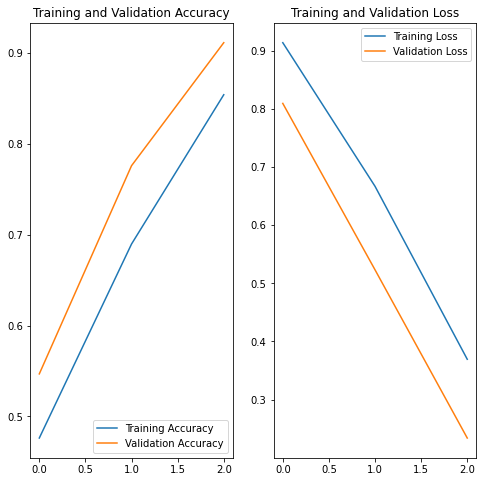

In [30]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(3), acc, label='Training Accuracy')
plt.plot(range(3), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(3), loss, label='Training Loss')
plt.plot(range(3), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___healthy
predicted label: Potato___healthy


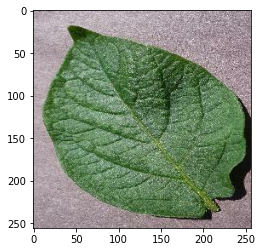

In [31]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

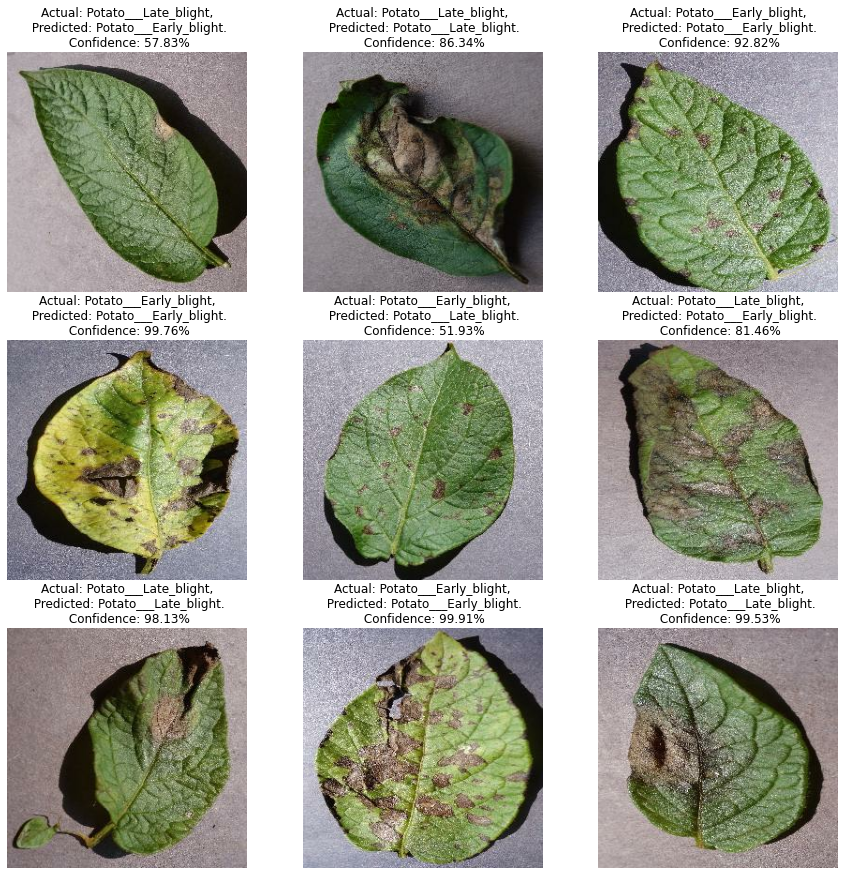

In [33]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [34]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/3\assets
